In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL
import os
import pathlib
from collections import defaultdict

os.chdir('/home/hatsunemiku/dev/mask-rcnn')

DATA_FOLDER = "./data/food201/"
FOOD_101_FOLDER = "/home/hatsunemiku/dev/food101-semi/data/food-101/images/"

In [2]:
def dataset_stats(df):
    print('Dataset shape: ', df.shape)
    print('Columns: ', df.columns)
    print('Head: \n', df.head())

In [3]:
def extract_segmented_pictures(df, dataset_type):
    """
    Copies the 10_000 segmented images from Food101 that contains total > 100_000 pictures.
    """
    image_folder = f"{DATA_FOLDER}images_{dataset_type}/"
    total = df.shape[0]
    print("================== START ==================")
    for i in range(total):
        filename = df.loc[i, "file"]
        food_folder = filename.split('/')[0]
        if not os.path.exists(image_folder + food_folder):
            os.makedirs(image_folder + food_folder)
        try:
            os.rename(FOOD_101_FOLDER + filename, image_folder + filename)
        except:
            print(f"Could not copy file: {filename}")
        if i % 1000 == 0:
            print(f"Copied {i} / {total} files")

    print("================== DONE ==================")

In [4]:
def prepare_image_dataset(dataset_type):
    """
    Parses and finds images for given `dataset_type`: {test, train}.
    """
    df = pd.read_csv(DATA_FOLDER + dataset_type + "_multilabel.csv", header=None, names=['all'])

    dataset_stats(df)

    df['file'] = df['all'].apply(lambda x: x.split(' ')[0])
    df['ids'] = df['all'].apply(lambda x: x.split(' ')[1:])
    df.drop(columns=["all"], inplace=True)
    dataset_stats(df)
    
    # DONE ALREADY
    # extract_segmented_pictures(df, dataset_type)
    return df

In [5]:
df_labels = pd.read_csv(DATA_FOLDER + "multilabel_map.csv", header=None, names=["id", "food"])

In [6]:
dataset_stats(df_labels)


Dataset shape:  (201, 2)
Columns:  Index(['id', 'food'], dtype='object')
Head: 
    id       food
0   0  apple pie
1   1    arugula
2   2  asparagus
3   3     au jus
4   4    avocado


In [7]:
MAX_ID = df_labels["id"].max()
MAX_ID

200

In [8]:
df_train = prepare_image_dataset('train')


Dataset shape:  (35242, 1)
Columns:  Index(['all'], dtype='object')
Head: 
                                 all
0          omelette/3532836.jpg 134
1  frozen_yogurt/3667619.jpg 88 183
2            paella/3673967.jpg 140
3   baby_back_ribs/3781340.jpg 5 69
4         creme_brulee/82255.jpg 63
Dataset shape:  (35242, 2)
Columns:  Index(['file', 'ids'], dtype='object')
Head: 
                          file        ids
0        omelette/3532836.jpg      [134]
1   frozen_yogurt/3667619.jpg  [88, 183]
2          paella/3673967.jpg      [140]
3  baby_back_ribs/3781340.jpg    [5, 69]
4      creme_brulee/82255.jpg       [63]


In [9]:
df_test = prepare_image_dataset('test')


Dataset shape:  (15132, 1)
Columns:  Index(['all'], dtype='object')
Head: 
                                        all
0  strawberry_shortcake/837744.jpg 184 199
1      pork_chop/540470.jpg 163 193 152 66
2              clam_chowder/2762472.jpg 54
3           baby_back_ribs/543585.jpg 5 81
4     lobster_roll_sandwich/670381.jpg 118
Dataset shape:  (15132, 2)
Columns:  Index(['file', 'ids'], dtype='object')
Head: 
                                file                  ids
0   strawberry_shortcake/837744.jpg           [184, 199]
1              pork_chop/540470.jpg  [163, 193, 152, 66]
2          clam_chowder/2762472.jpg                 [54]
3         baby_back_ribs/543585.jpg              [5, 81]
4  lobster_roll_sandwich/670381.jpg                [118]


In [10]:
test_images_dir = pathlib.Path(DATA_FOLDER + 'images_test/')
train_images_dir = pathlib.Path(DATA_FOLDER + 'images_train/')

In [11]:
train_count = len(list(train_images_dir.glob('*/*.jpg')))
print(f'Train images: {train_count}')

test_count = len(list(test_images_dir.glob('*/*.jpg')))
print(f'Test images: {test_count}')

Train images: 25588
Test images: 12693


In [12]:
test_image_sizes = defaultdict(int)

for img in test_images_dir.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    test_image_sizes[image.size] += 1

train_image_sizes = defaultdict(int)

for img in train_images_dir.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    train_image_sizes[image.size] += 1

In [13]:
for size, count in sorted(test_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 7904
Size (512, 384) 1870
Size (384, 512) 848
Size (382, 512) 345
Size (512, 382) 322
Size (512, 341) 174
Size (512, 288) 126
Size (512, 306) 104
Size (512, 289) 101
Size (512, 383) 73
Size (306, 512) 57
Size (511, 512) 45
Size (512, 342) 45
Size (288, 512) 44
Size (512, 340) 44
Size (512, 307) 39
Size (289, 512) 34
Size (383, 512) 33
Size (512, 287) 32
Size (512, 511) 29
Size (512, 343) 25
Size (341, 512) 22
Size (512, 339) 18
Size (287, 512) 14
Size (512, 385) 14


In [14]:
for size, count in sorted(train_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 15745
Size (512, 384) 3768
Size (384, 512) 1703
Size (382, 512) 667
Size (512, 382) 663
Size (512, 341) 333
Size (512, 306) 261
Size (512, 288) 253
Size (512, 289) 189
Size (512, 383) 168
Size (306, 512) 121
Size (511, 512) 117
Size (512, 340) 111
Size (512, 307) 86
Size (288, 512) 85
Size (383, 512) 85
Size (512, 342) 85
Size (341, 512) 77
Size (512, 511) 68
Size (512, 287) 67
Size (289, 512) 54
Size (512, 343) 47
Size (512, 339) 42
Size (307, 512) 30
Size (512, 385) 26
Size (512, 509) 24
Size (512, 308) 16
Size (287, 512) 16
Size (512, 508) 15
Size (512, 500) 15
Size (512, 471) 14
Size (512, 386) 13
Size (512, 366) 12
Size (342, 512) 11
Size (512, 510) 11
Size (512, 304) 10


In [15]:
def extract_masks(df, dataset_type):
    """
    Split the masks into train / test sets and removes any image without mask.
    """
    mask_folder = f"{DATA_FOLDER}masks_{dataset_type}/"

    total = df.shape[0]
    print("================== START ==================")
    for i in range(total):
        filename = df.loc[i, "file"]
        food_folder = filename.split('/')[0]
        filename_png = filename.split('.')[0] + '.png'

        if not os.path.exists(mask_folder + food_folder):
            os.makedirs(mask_folder + food_folder)
        try:
            os.rename(DATA_FOLDER + 'pixel_annotations/' + filename_png, mask_folder + filename_png)
        except:
            print(f"Could not find mask for file: {filename}")
        if i % 1000 == 0:
            print(f"Copied {i} / {total} files")

    print("================== DONE ==================")

In [16]:
extract_masks(df_test, 'test')


================== START ==================
Could not find mask for file: strawberry_shortcake/837744.jpg
Copied 0 / 15132 files
Could not find mask for file: pork_chop/540470.jpg
Could not find mask for file: clam_chowder/2762472.jpg
Could not find mask for file: baby_back_ribs/543585.jpg
Could not find mask for file: ice_cream/2998712.jpg
Could not find mask for file: beet_salad/347874.jpg
Could not find mask for file: sushi/780283.jpg
Could not find mask for file: carrot_cake/2902801.jpg
Could not find mask for file: dumplings/882708.jpg
Could not find mask for file: bibimbap/562370.jpg
Could not find mask for file: onion_rings/2668349.jpg
Could not find mask for file: macarons/492902.jpg
Could not find mask for file: paella/2464951.jpg
Could not find mask for file: seaweed_salad/3265901.jpg
Could not find mask for file: croque_madame/377143.jpg
Could not find mask for file: cheese_plate/3910057.jpg
Could not find mask for file: tuna_tartare/3737722.jpg
Could not find mask for file:

In [17]:
extract_masks(df_train, 'train')


================== START ==================
Could not find mask for file: omelette/3532836.jpg
Copied 0 / 35242 files
Could not find mask for file: paella/3673967.jpg
Could not find mask for file: baby_back_ribs/3781340.jpg
Could not find mask for file: creme_brulee/82255.jpg
Could not find mask for file: cheese_plate/3401246.jpg
Could not find mask for file: macaroni_and_cheese/397066.jpg
Could not find mask for file: fried_rice/480064.jpg
Could not find mask for file: takoyaki/822322.jpg
Could not find mask for file: macaroni_and_cheese/3803409.jpg
Could not find mask for file: french_fries/3285020.jpg
Could not find mask for file: creme_brulee/763564.jpg
Could not find mask for file: miso_soup/74615.jpg
Could not find mask for file: apple_pie/3410227.jpg
Could not find mask for file: deviled_eggs/453102.jpg
Could not find mask for file: oysters/3000868.jpg
Could not find mask for file: peking_duck/340118.jpg
Could not find mask for file: spaghetti_carbonara/2800356.jpg
Could not fin

In [26]:
test_masks = pathlib.Path(DATA_FOLDER + 'masks_test/')
train_masks = pathlib.Path(DATA_FOLDER + 'masks_train/')

In [27]:
print(f"Tests images with mask: {len(list(test_masks.glob('*/*.png')))}")
print(f"Train images with mask: {len(list(train_masks.glob('*/*.png')))}")

Tests images with mask: 2439
Train images with mask: 9654


In [26]:
def extract_segmented(dataset_type):
    """
    Removes all test / train images without a mask.
    """
    mask_folder = pathlib.Path(f"{DATA_FOLDER}masks_{dataset_type}/")
    image_folder = pathlib.Path(f"{DATA_FOLDER}images_{dataset_type}")
    new_image_folder = pathlib.Path(f"{DATA_FOLDER}segmented_{dataset_type}")

    removed = 0
    total = 0

    print("================== START ==================")
    for mask in mask_folder.glob('*/*'):
        # Map to jpeg file.
        print(mask)
        filefolder = str(mask).split('/')[-2]
        filename = filefolder + '/' + str(mask).split('/')[-1].split('.')[0] + '.jpg'
        filepath = image_folder / filename
        newpath = new_image_folder / filename

        if not os.path.exists(new_image_folder / filefolder):
            os.makedirs(new_image_folder / filefolder)

        os.replace(filepath, newpath)
        total += 1
    
    print(f"Removed {total} files")
    print("================== DONE ==================")

In [27]:
extract_segmented('test')

================== START ==================
data/food201/masks_test/chicken_quesadilla/2918136.png
data/food201/masks_test/chicken_quesadilla/2861172.png
data/food201/masks_test/chicken_quesadilla/2761578.png
data/food201/masks_test/chicken_quesadilla/2942490.png
data/food201/masks_test/chicken_quesadilla/605279.png
data/food201/masks_test/chicken_quesadilla/2742303.png
data/food201/masks_test/chicken_quesadilla/3856227.png
data/food201/masks_test/chicken_quesadilla/3830713.png
data/food201/masks_test/chicken_quesadilla/3319078.png
data/food201/masks_test/chicken_quesadilla/703180.png
data/food201/masks_test/chicken_quesadilla/404193.png
data/food201/masks_test/chicken_quesadilla/9290.png
data/food201/masks_test/chicken_quesadilla/2807010.png
data/food201/masks_test/chicken_quesadilla/268471.png
data/food201/masks_test/chicken_quesadilla/535327.png
data/food201/masks_test/chicken_quesadilla/2560042.png
data/food201/masks_test/chicken_quesadilla/3282314.png
data/food201/masks_test/chick

In [28]:
extract_segmented('train')

================== START ==================
data/food201/masks_train/chicken_quesadilla/3724134.png
data/food201/masks_train/chicken_quesadilla/440384.png
data/food201/masks_train/chicken_quesadilla/3091337.png
data/food201/masks_train/chicken_quesadilla/711089.png
data/food201/masks_train/chicken_quesadilla/3466414.png
data/food201/masks_train/chicken_quesadilla/3419690.png
data/food201/masks_train/chicken_quesadilla/386047.png
data/food201/masks_train/chicken_quesadilla/972182.png
data/food201/masks_train/chicken_quesadilla/3304558.png
data/food201/masks_train/chicken_quesadilla/3083828.png
data/food201/masks_train/chicken_quesadilla/66288.png
data/food201/masks_train/chicken_quesadilla/659503.png
data/food201/masks_train/chicken_quesadilla/3784496.png
data/food201/masks_train/chicken_quesadilla/3468778.png
data/food201/masks_train/chicken_quesadilla/873901.png
data/food201/masks_train/chicken_quesadilla/3342542.png
data/food201/masks_train/chicken_quesadilla/507160.png
data/food201/

In [28]:
test_s = pathlib.Path(DATA_FOLDER + 'segmented_test/')
train_s = pathlib.Path(DATA_FOLDER + 'segmented_train/')

print(f"Tests images with mask: {len(list(test_s.glob('*/*.jpg')))}")
print(f"Train images with mask: {len(list(train_s.glob('*/*.jpg')))}")

Tests images with mask: 2439
Train images with mask: 9654


In [15]:
df_test["present"] = False
df_train["present"] = False

In [17]:
def remove_unused_entries(df, dataset_type):
    """
    Removes all entries that don't have segmented image.
    """
    segmented_folder = pathlib.Path(f"{DATA_FOLDER}segmented_{dataset_type}")

    for image in segmented_folder.glob('*/*'):
        filename = ('/').join(str(image).split('/')[-2:])
        df.loc[df['file'] == filename, 'present'] = True

In [18]:
remove_unused_entries(df_test, 'test')


In [19]:
df_test['present'].value_counts()


False    12693
True      2439
Name: present, dtype: int64

In [20]:
remove_unused_entries(df_train, 'train')
df_train['present'].value_counts()


False    25588
True      9654
Name: present, dtype: int64

In [21]:
df_test = df_test[df_test["present"] == True]
df_test.drop(columns=["present"], inplace=True)
df_test.shape

(2439, 2)

In [22]:
df_train = df_train[df_train["present"] == True]
df_train.drop(columns=["present"], inplace=True)
df_train.shape

(9654, 2)

In [39]:
df_train_stored = df_train
df_test_stored = df_test

%store df_train_stored
%store df_test_stored

Stored 'df_train_stored' (DataFrame)
Stored 'df_test_stored' (DataFrame)


In [43]:
df_train.to_csv('train_images_101_labels.csv')
df_test.to_csv('test_images_101_labels.csv')

In [40]:
test_image_sizes = defaultdict(int)

for img in test_s.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    test_image_sizes[image.size] += 1

train_image_sizes = defaultdict(int)

for img in train_s.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    train_image_sizes[image.size] += 1

In [41]:
for size, count in sorted(test_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 1514
Size (512, 384) 365
Size (384, 512) 173
Size (382, 512) 66
Size (512, 382) 61
Size (512, 288) 27
Size (512, 341) 26
Size (512, 306) 22
Size (512, 289) 20
Size (306, 512) 14
Size (512, 342) 11


In [42]:
for size, count in sorted(train_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")


Size (512, 512) 5969
Size (512, 384) 1397
Size (384, 512) 634
Size (382, 512) 258
Size (512, 382) 249
Size (512, 341) 151
Size (512, 288) 112
Size (512, 289) 92
Size (512, 306) 84
Size (306, 512) 46
Size (512, 383) 46
Size (512, 340) 43
Size (512, 307) 40
Size (511, 512) 39
Size (288, 512) 34
Size (512, 342) 31
Size (383, 512) 26
Size (512, 287) 22
Size (289, 512) 21
Size (341, 512) 20
Size (307, 512) 17
Size (512, 509) 17
Size (512, 511) 17
Size (512, 339) 14
Size (512, 343) 12


In [40]:
def food_frequency(df):
    food_ids = np.concatenate(df["ids"].values)
    food_ids_u, food_ids_c = np.unique(food_ids, return_counts=True)
    food_ids_u = [int(x) for x in food_ids_u]
    print(food_ids_u)
    print(food_ids_c)
    foods = []

    food_ids_u, food_ids_c = zip(*sorted(zip(food_ids_u, food_ids_c), key=lambda x: x[1]))

    for food_id, count in zip(food_ids_u, food_ids_c):
        food = df_labels.loc[int(food_id), "food"]
        foods.append(food)

        print(f"[{food_id:>3}] {food:25} {count}")
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,80))
    ax.barh(y=range(len(foods)), width=food_ids_c, tick_label=foods, align='center', color="#87CEFA")
    plt.show()

[0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[108  31  54 107 189 100  28 113  53  41 104  96  84  45 100 226 120 102
 335 317  96  85  90 115  41 10

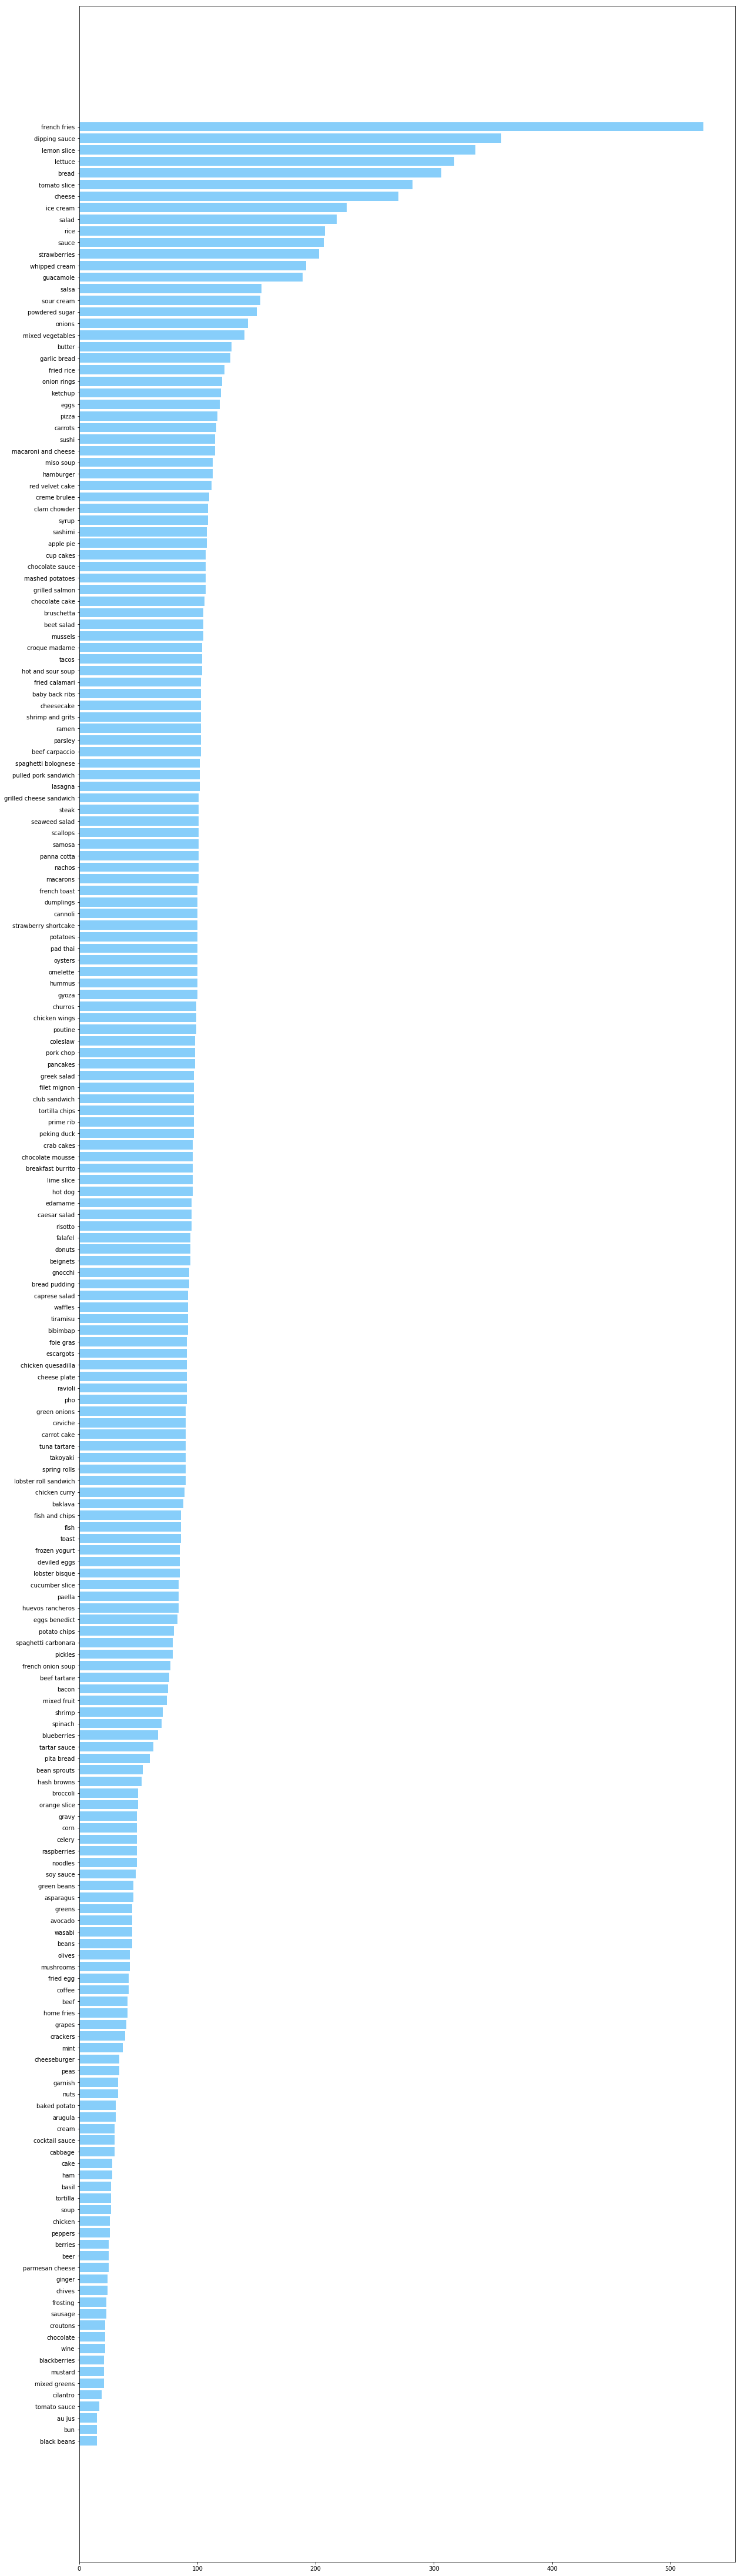

In [41]:
food_frequency(df_train)


[0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[ 28  14  16  22  52  32  17  29  11  14  28  29  28   7  25  48  35  18
 101  71  16  26  21  30   5  1

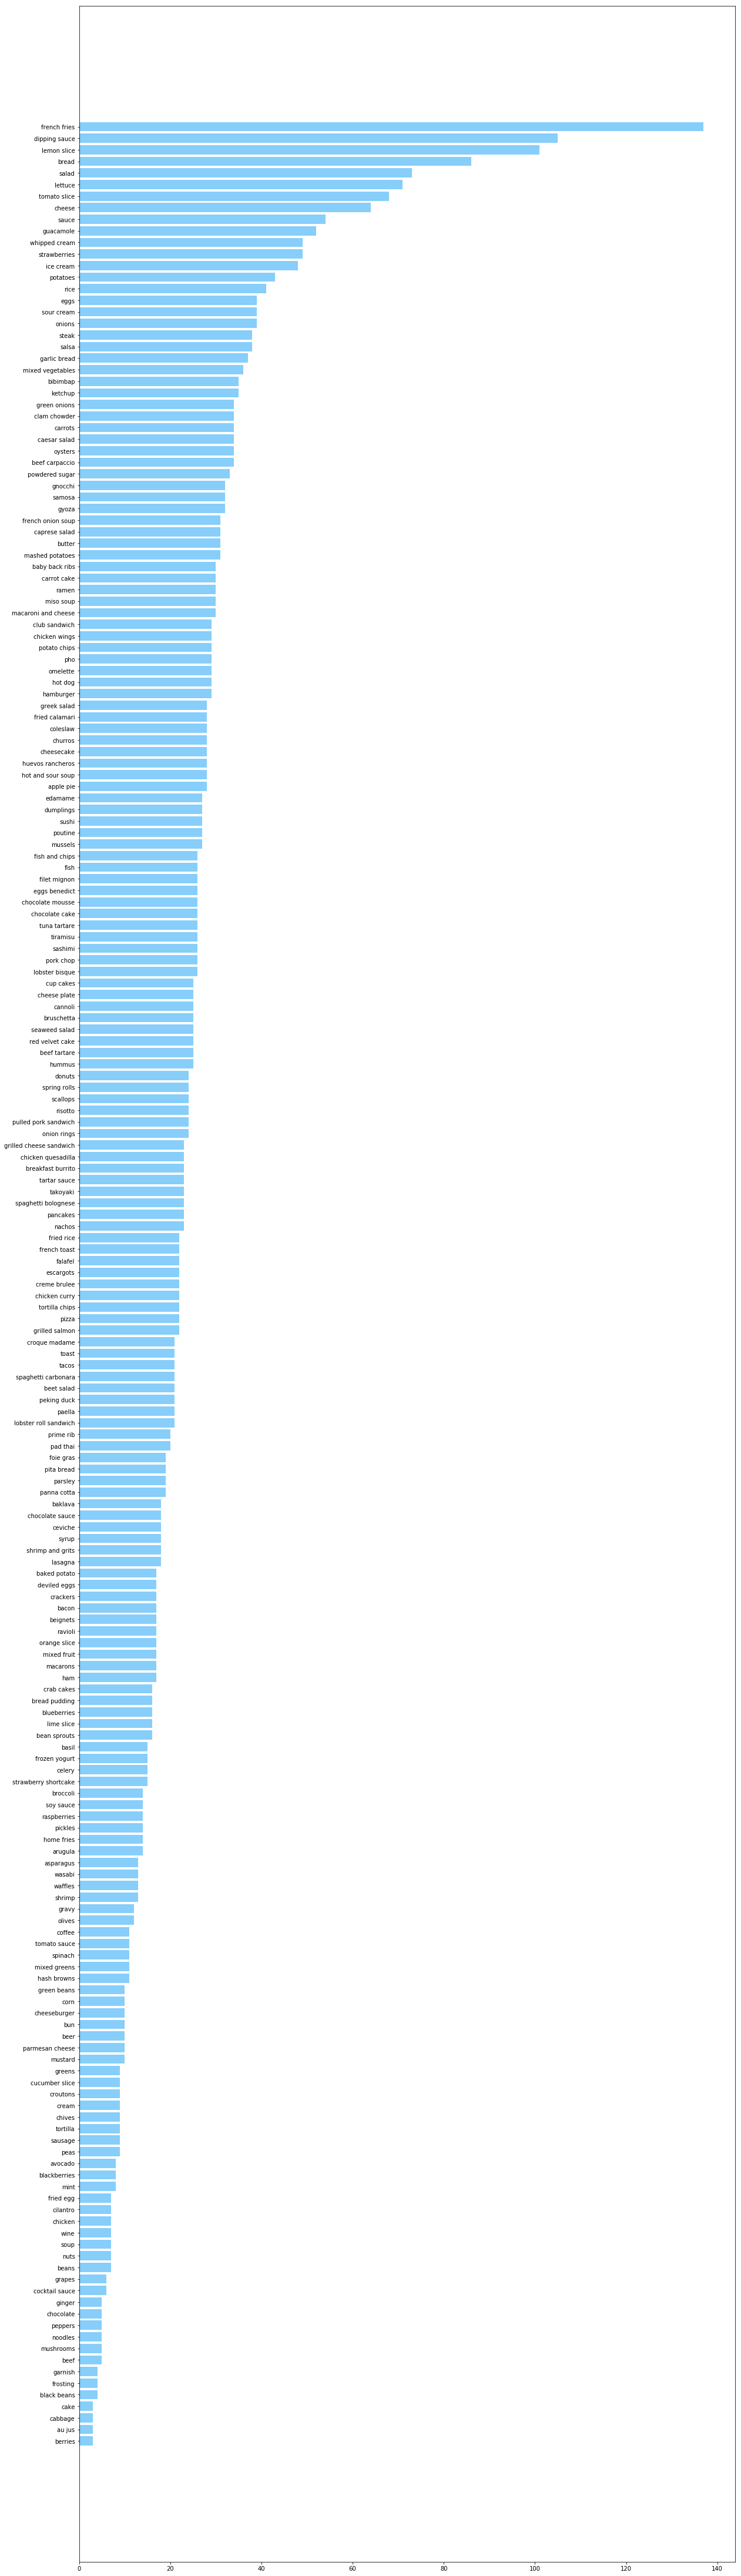

In [42]:
food_frequency(df_test)


In [51]:
food_ids_test = np.concatenate(df_test["ids"].values)
food_ids_test_u, food_ids_test_c = np.unique(food_ids_test, return_counts=True)

food_ids_train = np.concatenate(df_train["ids"].values)
food_ids_train_u, food_ids_train_c = np.unique(food_ids_train, return_counts=True)

food_ids_test_u, food_ids_test_c = zip(*sorted(zip(food_ids_test_u, food_ids_test_c), key=lambda x: x[0]))
food_ids_train_u, food_ids_train_c = zip(*sorted(zip(food_ids_train_u, food_ids_train_c), key=lambda x: x[0]))

food_id = 0
index_test = 0
index_train = 0

abundancy_ratios = []

while food_id <= MAX_ID:

    id_train = food_ids_train_u[index_train]
    id_test = food_ids_test_u[index_test]

    food = df_labels.loc[int(food_id), "food"]

    if id_train == id_test:
        count_train = food_ids_train_c[index_train]
        count_test = food_ids_test_c[index_test]

        ratio = count_train / count_test
        abundancy_ratios.append(ratio)

        print(f"[{food_id:>3}] {food:25} {count_train:4d} {count_train / df_train.shape[0]:.2f} {count_test:4d} {count_test / df_test.shape[0]:.2f}  {ratio:.2f}")
        index_train += 1
        index_test += 1

    elif id_train > id_test:
        print(f"[{food_id:>3}] {food:25} {count_test:4d} ONLY IN TEST SET")
        index_test += 1
    elif id_train < id_test:
        print(f"[{food_id:>3}] {food:25} {count_train:4d} ONLY IN TRAIN SET")
        index_train += 1

    food_id += 1

[  0] apple pie                  108 0.01   28 0.01  3.86
[  1] arugula                     31 0.00   14 0.01  2.21
[  2] asparagus                   54 0.01   16 0.01  3.38
[  3] au jus                     107 0.01   22 0.01  4.86
[  4] avocado                    189 0.02   52 0.02  3.63
[  5] baby back ribs             100 0.01   32 0.01  3.12
[  6] bacon                       28 0.00   17 0.01  1.65
[  7] baked potato               113 0.01   29 0.01  3.90
[  8] baklava                     53 0.01   11 0.00  4.82
[  9] basil                       41 0.00   14 0.01  2.93
[ 10] bean sprouts               104 0.01   28 0.01  3.71
[ 11] beans                       96 0.01   29 0.01  3.31
[ 12] beef                        84 0.01   28 0.01  3.00
[ 13] beef carpaccio              45 0.00    7 0.00  6.43
[ 14] beef tartare               100 0.01   25 0.01  4.00
[ 15] beer                       226 0.02   48 0.02  4.71
[ 16] beet salad                 120 0.01   35 0.01  3.43
[ 17] beignets

(array([ 3.,  2.,  1.,  1.,  3.,  4.,  6.,  4., 10.,  8.,  9., 21., 11.,
        15., 14., 14.,  7., 10.,  5.,  6., 12.,  2.,  3.,  3.,  6.,  2.,
         6.,  0.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.]),
 array([ 1.5 ,  1.67,  1.84,  2.01,  2.18,  2.35,  2.52,  2.69,  2.86,
         3.03,  3.2 ,  3.37,  3.54,  3.71,  3.88,  4.05,  4.22,  4.39,
         4.56,  4.73,  4.9 ,  5.07,  5.24,  5.41,  5.58,  5.75,  5.92,
         6.09,  6.26,  6.43,  6.6 ,  6.77,  6.94,  7.11,  7.28,  7.45,
         7.62,  7.79,  7.96,  8.13,  8.3 ,  8.47,  8.64,  8.81,  8.98,
         9.15,  9.32,  9.49,  9.66,  9.83, 10.  ]),
 <a list of 50 Patch objects>)

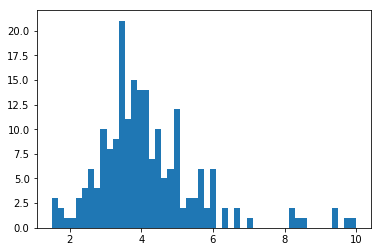

In [52]:
plt.hist(abundancy_ratios, bins=50)


In [44]:
import torch
import os
os.chdir('/home/hatsunemiku/dev/mask-rcnn')

import utils
import transforms as T
from dataloader import Food201Dataset
from engine import train_one_epoch, evaluate
from model import get_model_instance_segmentation

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)


# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2
# use our dataset and defined transformations
dataset_test = Food201Dataset('/home/hatsunemiku/dev/mask-rcnn/data/food201', get_transform(train=False), False)

data_loader = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)
model.load_state_dict(torch.load('./food201_model.pkl', map_location=torch.device('cpu')))

<All keys matched successfully>

In [45]:
import math
import sys
import time
import torch
import torchvision.models.detection.mask_rcnn
import utils
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator

def _get_iou_types(model):
    model_without_ddp = model
    if isinstance(model, torch.nn.parallel.DistributedDataParallel):
        model_without_ddp = model.module
    iou_types = ["bbox"]
    if isinstance(model_without_ddp, torchvision.models.detection.MaskRCNN):
        iou_types.append("segm")
    if isinstance(model_without_ddp, torchvision.models.detection.KeypointRCNN):
        iou_types.append("keypoints")
    return iou_types


n_threads = torch.get_num_threads()
# FIXME remove this and make paste_masks_in_image run on the GPU
torch.set_num_threads(1)
cpu_device = torch.device("cpu")
model.eval()
metric_logger = utils.MetricLogger(delimiter="  ")
header = 'Test:'

coco = get_coco_api_from_dataset(data_loader.dataset)
iou_types = _get_iou_types(model)
coco_evaluator = CocoEvaluator(coco, iou_types)

for images, targets in metric_logger.log_every(data_loader, 100, header):
    images = list(img.to(device) for img in images)

    torch.cuda.synchronize()
    model_time = time.time()
    outputs = model(images)

    outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
    model_time = time.time() - model_time

    res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}
    evaluator_time = time.time()
    coco_evaluator.update(res)
    evaluator_time = time.time() - evaluator_time
    metric_logger.update(model_time=model_time, evaluator_time=evaluator_time)

# gather the stats from all processes
metric_logger.synchronize_between_processes()
print("Averaged stats:", metric_logger)
coco_evaluator.synchronize_between_processes()

# accumulate predictions from all images
coco_evaluator.accumulate()
coco_evaluator.summarize()
torch.set_num_threads(n_threads)

creating index...
index created!
Test:  [   0/2439]  eta: 0:06:40  model_time: 0.1198 (0.1198)  evaluator_time: 0.0178 (0.0178)  time: 0.1643  data: 0.0083  max mem: 728
Test:  [ 100/2439]  eta: 0:02:42  model_time: 0.0458 (0.0519)  evaluator_time: 0.0052 (0.0076)  time: 0.0637  data: 0.0085  max mem: 1619
Test:  [ 200/2439]  eta: 0:02:37  model_time: 0.0581 (0.0524)  evaluator_time: 0.0110 (0.0080)  time: 0.0794  data: 0.0090  max mem: 1655
Test:  [ 300/2439]  eta: 0:02:30  model_time: 0.0515 (0.0524)  evaluator_time: 0.0081 (0.0081)  time: 0.0722  data: 0.0083  max mem: 1655
Test:  [ 400/2439]  eta: 0:02:21  model_time: 0.0532 (0.0522)  evaluator_time: 0.0105 (0.0078)  time: 0.0759  data: 0.0088  max mem: 1655
Test:  [ 500/2439]  eta: 0:02:15  model_time: 0.0503 (0.0524)  evaluator_time: 0.0085 (0.0079)  time: 0.0722  data: 0.0088  max mem: 1655
Test:  [ 600/2439]  eta: 0:02:09  model_time: 0.0535 (0.0526)  evaluator_time: 0.0093 (0.0080)  time: 0.0730  data: 0.0087  max mem: 1655
Te

In [48]:
import numpy as np
import matplotlib.pyplot as plt

draw_list = [0.5,0.75,0.8,0.85,0.9,0.95]
for iou_type, coco_eval in coco_evaluator.coco_eval.items():
    # pr_array = coco_eval.eval['precision'][0, :, 1:, 0, 2]
    # print(pr_array.shape)
    # pr_array = np.mean(pr_array,axis=1)
    # print(pr_array.shape)
    for i in range(10):
        pr_array = coco_eval.eval['precision'][i, :, :, 0, 2]
        # pr_array1 = coco_eval.eval['precision'][0, :, :, 0, 2]
        # pr_array2 = coco_eval.eval['precision'][5, :, :, 0, 2]
        # pr_array3 = coco_eval.eval['precision'][8, :, :, 0, 2]
        pr_array = np.mean(pr_array,axis=1)

        # pr_array1 = np.mean(pr_array1,axis=1)
        # pr_array2 = np.mean(pr_array2,axis=1)
        # pr_array3 = np.mean(pr_array3,axis=1)
        x = np.arange(0.0, 1.01, 0.01)
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.xlim(0, 1.0)
        plt.ylim(0, 1.01)
        plt.grid(True)

        # plt.plot(x, pr_array1, 'b-', label='IoU=0.5')
        # plt.plot(x, pr_array2, 'c-', label='IoU=0.75')
        # plt.plot(x, pr_array3, 'y-', label='IoU=0.9')
        iou = round(0.5+0.05*i, 2)
        if iou in draw_list:
            print(pr_array)
            plt.plot(x, pr_array, label='IoU='+str(iou))

    plt.legend(loc="top right")
    plt.savefig("pr_curve_{}.jpg".format(iou_type), dpi=300)  #输入地址，并利用format函数修改图片名称
    plt.clf() #需要重新更新画布，否则会出现同一张画布上绘制多张图片


    print(coco_eval.eval['recall'].shape)
    for i in range(3):
        recall_array = coco_eval.eval['recall'][:, :, 0, i]
        recall_array = np.mean(recall_array, axis=1)
        x = np.arange(0.5, 1.0, 0.05)
        plt.xlabel('IoU')
        plt.ylabel('recall')
        plt.xlim(0.5, 0.95)
        plt.ylim(0, 1.01)
        plt.grid(True)

        plt.plot(x, recall_array, label='maxDets='+str(10**i))
    plt.legend(loc="lower left")
    plt.savefig("recall_iou_curve_{}.jpg".format(iou_type), dpi=300)  #输入地址，并利用format函数修改图片名称
    plt.clf() #需要重新更新画布，否则会出现同一张画布上绘制多张图片

[1.         1.         1.         1.         1.         1.
 1.         1.         0.99766355 0.99766355 0.99766355 0.99605523
 0.99605523 0.99320883 0.99320883 0.99090909 0.98961424 0.98603352
 0.98602287 0.98566308 0.98538012 0.98538012 0.98538012 0.98538012
 0.98538012 0.98446069 0.98446069 0.98275862 0.98140321 0.98127036
 0.97963978 0.97799697 0.97733711 0.97733711 0.97527473 0.97386059
 0.97359948 0.9717159  0.97170972 0.96806623 0.96567772 0.96206116
 0.95975744 0.95735608 0.954047   0.95081136 0.95034757 0.94915254
 0.94631829 0.94300278 0.93860045 0.93495575 0.93011217 0.92580101
 0.91731478 0.91061453 0.90237262 0.89300567 0.88798521 0.88203463
 0.87614356 0.86996904 0.86357527 0.85400982 0.84319338 0.83194573
 0.82206192 0.80967648 0.79129213 0.77753603 0.76450422 0.75217391
 0.73684211 0.71890606 0.7073621  0.68891353 0.67524116 0.6511533
 0.62913907 0.6016918  0.57677577 0.55135579 0.52520878 0.50403167
 0.47559809 0.45007032 0.4255675  0.4020308  0.36866592 0.33162393
 0.2

<Figure size 432x288 with 0 Axes>